# pyrecorder

# Installation

The framework is available at the PyPi Repository:

# Usage

## GIF

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from pyrecorder.video import Video
from pyrecorder.recorders.gif import GIF

vid = Video(GIF("example.gif"))

for k in range(10):
    X = np.random.random((100, 2))
    plt.scatter(X[:, 0], X[:, 1])
    vid.record()

vid.close()

Now you can check out the `GIF` file or also render it in `Jupyter` with

```
from pyrecorder.video import load
load("example.gif")
```

The resulting animation looks as follows:

In [2]:
%%HTML
<img src="example.gif" alt="ExampleGIF">

## Video

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from pyrecorder.video import Video
from pyrecorder.recorders.file import File

vid = Video(File("example.mp4"))

for k in range(10):
    X = np.random.random((100, 2))
    plt.scatter(X[:, 0], X[:, 1])
    vid.record()

vid.close()

The file has been stored to the provided path. You can also render the video in `Jupyter` with

```
from pyrecorder.video import load
load("example.mp4")
```

The resulting animation looks as follows:

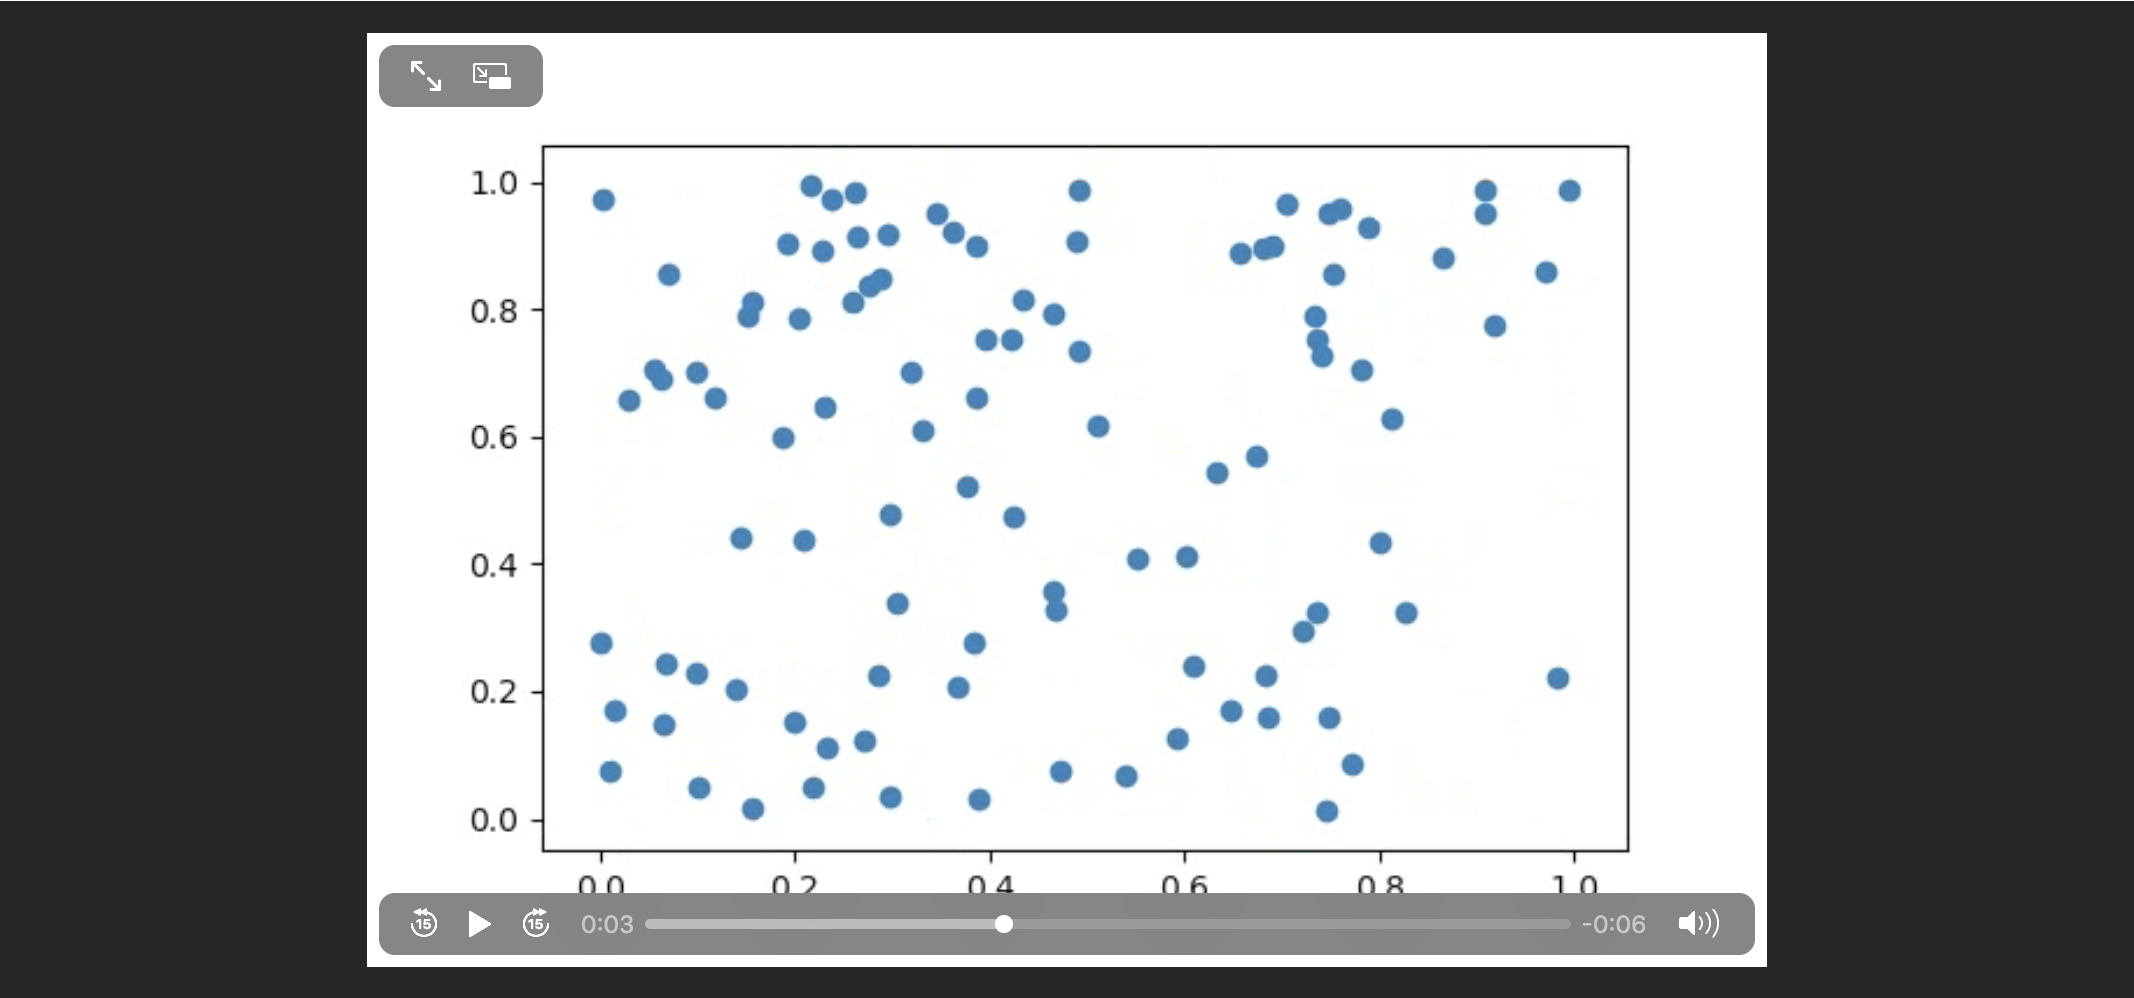

In [11]:
from IPython.display import Image
Image("video.png")

# Contact